# This is my Capstone Project for IBM Data Science Professional Course

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import scipy.optimize as opt
from sklearn.model_selection import train_test_split

In [2]:
print("Hello Capstone Project Course")
print("Download Collisions Data")
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

Hello Capstone Project Course
Download Collisions Data
--2020-09-12 03:02:42--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  1.34MB/s   in 54s    

2020-09-12 03:03:36 (1.31 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
collision_data = pd.read_csv("Data-Collisions.csv", delimiter=",")
collision_data[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
location_data = collision_data[['X','Y','ADDRTYPE','LOCATION','JUNCTIONTYPE','SEGLANEKEY','CROSSWALKKEY','SEVERITYCODE']]

### Address Type (ADDRTYPE) is chosen as the attribute to the severity level

### First, we check the balance of target variable 'SEVERITYCODE' , where 1 indicates that collision involves property damage only, and 2 indicates collisions that involve injuries

In [5]:
collision_data['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22f345bb38>]],
      dtype=object)

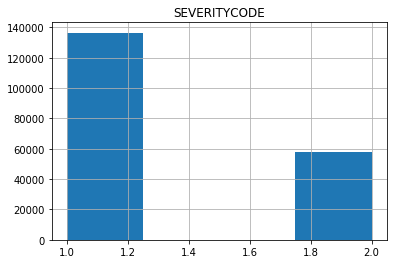

In [6]:
collision_data.hist(column='SEVERITYCODE', bins=4)

### Check Data Types

In [6]:
collision_data.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Observe missing data

In [7]:
missing_data = collision_data.isnull()

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

Refresher note on how to handle missing data : 
1. Replace with Mean \
avg_column=df['columnname'].astype('float').mean(axis=0) \
df['columnname'].replace(np.nan, avg_column, inplace=True) 

2. Replace with Most Frequent \
df['columnname'].value_counts().idxmax() \
df["columnname"].replace(np.nan, "mostfrequentvalue", inplace=True) 

3. Drop the rows  \
df.dropna(subset=["columnname"], axis=0, inplace=True)  


### Plot Collision into Seattle Map 

In [9]:
location_data.dropna(subset=["X"], axis=0, inplace=True)
location_data['SEVERITYCODE'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1    132221
2     57118
Name: SEVERITYCODE, dtype: int64

In [12]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [ ]:
# define the world map centered around Seattle with a low zoom level

# Seattle latitude and longitude values
latitude = 47.61
longitude = -122.34

# create map and display it
Seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
Seattle_map

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the incidents and add each to the incidents feature group
for lat, lng, in zip(location_data.Y, location_data.X):
     incidents.add_child(
         folium.features.CircleMarker(
             [lat, lng],
             radius=1, # define how big you want the circle markers to be
             color='yellow',
             fill=True,
             fill_color='blue',
             fill_opacity=0.1
         )
     )

# add incidents to map
Seattle_map.add_child(incidents)

## DATA EXPLORATORY

In [10]:
severity_addrtype = collision_data[['ADDRTYPE','SEVERITYCODE']]
sevr_by_adtype = collision_data.groupby(['ADDRTYPE', 'SEVERITYCODE']).size().to_frame()
#severity_by_addrtype = severity_addrtype.groupby(['ADDRTYPE']).agg({'SEVERITYCODE':['count']}),as_index=False)
sevr_by_adtype

0
ADDRTYPE     SEVERITYCODE       
Alley        1               669
             2                82
Block        1             96830
             2             30096
Intersection 1             37251
             2             27819

In [14]:
sevr_by_junctiontype = collision_data.groupby(['JUNCTIONTYPE', 'SEVERITYCODE']).size().to_frame()
sevr_by_junctiontype

0
JUNCTIONTYPE                                      SEVERITYCODE       
At Intersection (but not related to intersection) 1              1475
                                                  2               623
At Intersection (intersection related)            1             35636
                                                  2             27174
Driveway Junction                                 1              7437
                                                  2              3234
Mid-Block (but intersection related)              1             15493
                                                  2              7297
Mid-Block (not related to intersection)           1             70396
                                                  2             19404
Ramp Junction                                     1               112
                                                  2                54
Unknown                                           1                 7
                                                  2                 2

In [11]:
sevr_by_coltype = collision_data.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).size().to_frame()
#severity_by_addrtype = severity_addrtype.groupby(['ADDRTYPE']).agg({'SEVERITYCODE':['count']}),as_index=False)
sevr_by_coltype

0
COLLISIONTYPE SEVERITYCODE       
Angles        1             21050
              2             13624
Cycles        1               671
              2              4744
Head On       1              1152
              2               872
Left Turn     1              8292
              2              5411
Other         1             17591
              2              6112
Parked Car    1             45325
              2              2662
Pedestrian    1               672
              2              5936
Rear Ended    1             19419
              2             14671
Right Turn    1              2347
              2               609
Sideswipe     1             16103
              2              2506

In [15]:
sevr_by_personcount = collision_data.groupby(['PERSONCOUNT', 'SEVERITYCODE']).size().to_frame()
sevr_by_personcount

0
PERSONCOUNT SEVERITYCODE       
0           1              3782
            2              1762
1           1              9858
            2              3296
2           1             86420
            2             27811
3           1             22092
            2             13461
4           1              8365
            2              6295
5           1              3615
            2              2969
6           1              1345
            2              1357
7           1               494
            2               637
8           1               249
            2               284
9           1                87
            2               129
10          1                54
            2                74
11          1                23
            2                33
12          1                13
            2                20
13          1                 9
            2                12
14          1                12
            2                 7
...                         ...
25          1                 5
            2                 1
26          1                 4
27          1                 2
            2                 1
28          1                 2
            2                 1
29          1                 2
            2                 1
30          1                 1
            2                 1
31          1                 1
32          1                 2
            2                 1
34          1                 1
            2                 2
35          1                 1
36          1                 2
37          1                 2
            2                 1
39          2                 1
41          1                 1
43          1                 1
44          1                 6
47          1                 3
48          2                 1
53          1                 1
54          2                 1
57          1                 1
81          2                 1

[79 rows x 1 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a660105f8>]],
      dtype=object)

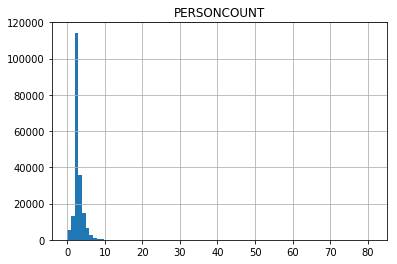

In [12]:
collision_data.hist(column='PERSONCOUNT', bins=82)

### Binning Date and Time data into Weekend_Indicator and RushHour_indicator

In [13]:
from datetime import date
import calendar

collision_data['WEEKDAY'] = pd.to_datetime(collision_data['INCDATE']).dt.dayofweek  # monday = 0, sunday = 6


In [14]:
collision_data['weekend_indi'] = 0          # Initialize the column with default value of 0
collision_data.loc[collision_data['WEEKDAY'].isin([5, 6]), 'weekend_indi'] = 1  # 5 and 6 correspond to Sat and Sun

In [15]:
sevr_by_weekend = collision_data.groupby(['weekend_indi', 'SEVERITYCODE']).size().to_frame()
sevr_by_weekend

0
weekend_indi SEVERITYCODE        
0            1             101291
             2              44038
1            1              35194
             2              14150

In [16]:
collision_data['INCDTTM'] =  pd.to_datetime(collision_data['INCDTTM'])
collision_data['inchour'] = collision_data['INCDTTM'].dt.hour
collision_data['rushhour_indi'] = 0          # Initialize the column with default value of 0
collision_data.loc[collision_data['inchour'].isin([7, 8, 16, 17]), 'rushhour_indi'] = 1  # 7-9 am 4-6pm are rush hours
collision_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEEKDAY,weekend_indi,inchour,rushhour_indi
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,10,Entering at angle,0,0,N,2,0,14,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,11,From same direction - both going straight - bo...,0,0,N,2,0,18,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,32,One parked--one moving,0,0,N,3,0,10,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,23,From same direction - all others,0,0,N,4,0,9,0
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,10,Entering at angle,0,0,N,2,0,8,1


In [17]:
sevr_by_rushhour = collision_data.groupby(['rushhour_indi', 'SEVERITYCODE']).size().to_frame()
sevr_by_rushhour

0
rushhour_indi SEVERITYCODE        
0             1             109659
              2              44832
1             1              26826
              2              13356

In [19]:
sevr_byPedRightViol = collision_data.groupby(['PEDROWNOTGRNT', 'SEVERITYCODE']).size().to_frame()
sevr_byPedRightViol

0
PEDROWNOTGRNT SEVERITYCODE      
Y             1              460
              2             4207

In [20]:
sevr_bySpeeding = collision_data.groupby(['SPEEDING', 'SEVERITYCODE']).size().to_frame()
sevr_bySpeeding

0
SPEEDING SEVERITYCODE      
Y        1             5802
         2             3531

In [21]:
sevr_byInattention = collision_data.groupby(['INATTENTIONIND', 'SEVERITYCODE']).size().to_frame()
sevr_byInattention

0
INATTENTIONIND SEVERITYCODE       
Y              1             19408
               2             10397

In [22]:
collision_data.loc[collision_data['UNDERINFL'].isin(['0']), 'UNDERINFL'] = 'N' 
collision_data.loc[collision_data['UNDERINFL'].isin(['1']), 'UNDERINFL'] = 'Y' 
sevr_byUnderInfl = collision_data.groupby(['UNDERINFL', 'SEVERITYCODE']).size().to_frame()
sevr_byUnderInfl

0
UNDERINFL SEVERITYCODE        
N         1             127071
          2              53597
Y         1               5559
          2               3562

In [23]:
sevr_byWeather = collision_data.groupby(['WEATHER', 'SEVERITYCODE']).size().to_frame()
sevr_byWeather

0
WEATHER                  SEVERITYCODE       
Blowing Sand/Dirt        1                41
                         2                15
Clear                    1             75295
                         2             35840
Fog/Smog/Smoke           1               382
                         2               187
Other                    1               716
                         2               116
Overcast                 1             18969
                         2              8745
Partly Cloudy            1                 2
                         2                 3
Raining                  1             21969
                         2             11176
Severe Crosswind         1                18
                         2                 7
Sleet/Hail/Freezing Rain 1                85
                         2                28
Snowing                  1               736
                         2               171
Unknown                  1             14275
                         2               816

In [24]:
sevr_byRoadCond = collision_data.groupby(['ROADCOND', 'SEVERITYCODE']).size().to_frame()
sevr_byRoadCond

0
ROADCOND       SEVERITYCODE       
Dry            1             84446
               2             40064
Ice            1               936
               2               273
Oil            1                40
               2                24
Other          1                89
               2                43
Sand/Mud/Dirt  1                52
               2                23
Snow/Slush     1               837
               2               167
Standing Water 1                85
               2                30
Unknown        1             14329
               2               749
Wet            1             31719
               2             15755

In [25]:
sevr_byLightCond = collision_data.groupby(['LIGHTCOND', 'SEVERITYCODE']).size().to_frame()
sevr_byLightCond

0
LIGHTCOND                SEVERITYCODE       
Dark - No Street Lights  1              1203
                         2               334
Dark - Street Lights Off 1               883
                         2               316
Dark - Street Lights On  1             34032
                         2             14475
Dark - Unknown Lighting  1                 7
                         2                 4
Dawn                     1              1678
                         2               824
Daylight                 1             77593
                         2             38544
Dusk                     1              3958
                         2              1944
Other                    1               183
                         2                52
Unknown                  1             12868
                         2               605

### Select Features for Model

In [26]:
collision_features = collision_data[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','weekend_indi','rushhour_indi','PEDROWNOTGRNT','SPEEDING','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]
collision_features.head(5)

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,weekend_indi,rushhour_indi,PEDROWNOTGRNT,SPEEDING,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,0,0,NaN,NaN,NaN,N,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2,0,0,NaN,NaN,NaN,N,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,4,0,0,NaN,NaN,NaN,N,Overcast,Dry,Daylight
3,1,Block,Other,3,0,0,NaN,NaN,NaN,N,Clear,Dry,Daylight
4,2,Intersection,Angles,2,0,1,NaN,NaN,NaN,N,Raining,Wet,Daylight


#### Review of Data Wrangling technique
' Changing data format \
df[["column1", "column2"]] = df[["column1", "column2"]].astype("float") \
df[["column3"]] = df[["column3"]].astype("int") \

'Normalization, for example \
 replace (original value) by (original value)/(maximum value) \
df['length'] = df['length']/df['length'].max() \

'Binning, for example \
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4) \
bins \
group_names = ['Low', 'Medium', 'High'] \
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True ) \
df[['horsepower','horsepower-binned']].head(20) \

'Dummy Variable , for example \
dummy_variable_1 = pd.get_dummies(df["fuel-type"]) \
dummy_variable_1.head() \
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True) \
dummy_variable_1.head() \
' merge data frame "df" and "dummy_variable_1"  \
df = pd.concat([df, dummy_variable_1], axis=1) \
'drop original column "fuel-type" from "df" \
df.drop("fuel-type", axis = 1, inplace=True) \

'Sample of SQL in Panda's
airports[(airports.iso_region == 'US-CA') & (airports.type == 'large_airport')][['ident', 'name', 'municipality']]

### For Data processing purpose, we will transform SeverityCode into two dummy columns:  PropertyDamage and Injury

In [27]:
dummy_variable_1 = pd.get_dummies(collision_features["SEVERITYCODE"])
dummy_variable_1.head()

,1,2
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [28]:
dummy_variable_1.rename(columns={1:'PropertyDamage', 2:'Injury'}, inplace=True)
dummy_variable_1.head()

,PropertyDamage,Injury
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [29]:
collision_features = pd.concat([collision_features, dummy_variable_1], axis=1)
collision_features.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,weekend_indi,rushhour_indi,PEDROWNOTGRNT,SPEEDING,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PropertyDamage,Injury
0,2,Intersection,Angles,2,0,0,NaN,NaN,NaN,N,Overcast,Wet,Daylight,0,1
1,1,Block,Sideswipe,2,0,0,NaN,NaN,NaN,N,Raining,Wet,Dark - Street Lights On,1,0
2,1,Block,Parked Car,4,0,0,NaN,NaN,NaN,N,Overcast,Dry,Daylight,1,0
3,1,Block,Other,3,0,0,NaN,NaN,NaN,N,Clear,Dry,Daylight,1,0
4,2,Intersection,Angles,2,0,1,NaN,NaN,NaN,N,Raining,Wet,Daylight,0,1


#### Data wrangling for ADDRTYPE

In [30]:
collision_features.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)
Array_Addrtype = collision_features['ADDRTYPE']

In [31]:
Array_Addrtype = pd.unique(collision_features['ADDRTYPE'])
Array_Addrtype

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [32]:
n = 1
for i in Array_Addrtype :
        collision_features.loc[collision_features['ADDRTYPE'] == i, 'ADDRTYPE'] = n   
        n = n + 1


In [33]:
collision_features['ADDRTYPE'] = collision_features['ADDRTYPE']/collision_features['ADDRTYPE'].max() 

#### Data wrangling for COLLISIONTYPE

In [34]:
collision_features.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)
Array_Collisiontype = collision_features['COLLISIONTYPE']

In [35]:
Array_Collisiontype = pd.unique(collision_features['COLLISIONTYPE'])
Array_Collisiontype

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'],
      dtype=object)

In [36]:
n = 1
for i in Array_Collisiontype :
        collision_features.loc[collision_features['COLLISIONTYPE'] == i, 'COLLISIONTYPE'] = n   
        n = n + 1


In [37]:
collision_features['COLLISIONTYPE'] = collision_features['COLLISIONTYPE']/collision_features['COLLISIONTYPE'].max() 

#### Data wrangling for PERSONCOUNT

In [38]:
collision_features['PERSONCOUNT'] = collision_features['PERSONCOUNT']/collision_features['PERSONCOUNT'].max() 

#### Data wrangling for PEDROWNOTGRNT

In [39]:
collision_features.fillna('N', inplace=True)
sevr_byPedRightViol2 = collision_features.groupby(['PEDROWNOTGRNT', 'SEVERITYCODE']).size().to_frame()
sevr_byPedRightViol2

0
PEDROWNOTGRNT SEVERITYCODE        
N             1             130513
              2              52776
Y             1                460
              2               4201

In [40]:
Array_Pedrownotgrnt = pd.unique(collision_features['PEDROWNOTGRNT'])
Array_Pedrownotgrnt

array(['N', 'Y'], dtype=object)

In [41]:
n = 0
for i in Array_Pedrownotgrnt :
        collision_features.loc[collision_features['PEDROWNOTGRNT'] == i, 'PEDROWNOTGRNT'] = n   
        n = n + 1

#### Data wrangling for SPEEDING

In [42]:
sevr_bySpeedingViol2 = collision_features.groupby(['SPEEDING', 'SEVERITYCODE']).size().to_frame()
sevr_bySpeedingViol2

0
SPEEDING SEVERITYCODE        
N        1             125208
         2              53464
Y        1               5765
         2               3513

In [43]:
Array_Speeding = pd.unique(collision_features['SPEEDING'])
Array_Speeding

array(['N', 'Y'], dtype=object)

In [44]:
n = 0
for i in Array_Speeding :
        collision_features.loc[collision_features['SPEEDING'] == i, 'SPEEDING'] = n   
        n = n + 1

#### Data wrangling for INATTENTIONIND

In [45]:
sevr_byInattention2 = collision_features.groupby(['INATTENTIONIND', 'SEVERITYCODE']).size().to_frame()
sevr_byInattention2

0
INATTENTIONIND SEVERITYCODE        
N              1             111679
               2              46602
Y              1              19294
               2              10375

In [46]:
Array_InattentionInd = pd.unique(collision_features['INATTENTIONIND'])
Array_InattentionInd

array(['N', 'Y'], dtype=object)

In [47]:
n = 0
for i in Array_InattentionInd :
        collision_features.loc[collision_features['INATTENTIONIND'] == i, 'INATTENTIONIND'] = n   
        n = n + 1

#### Data wrangling for UNDERINFL

In [48]:
sevr_byUnderInfl2 = collision_features.groupby(['UNDERINFL', 'SEVERITYCODE']).size().to_frame()
sevr_byUnderInfl2

0
UNDERINFL SEVERITYCODE        
N         1             125434
          2              53426
Y         1               5539
          2               3551

In [49]:
Array_UnderInfl = pd.unique(collision_features['UNDERINFL'])
Array_UnderInfl

array(['N', 'Y'], dtype=object)

In [50]:
n = 0
for i in Array_UnderInfl :
        collision_features.loc[collision_features['UNDERINFL'] == i, 'UNDERINFL'] = n   
        n = n + 1

#### Data wrangling for WEATHER

In [51]:
collision_features.loc[collision_features['WEATHER'] == "N", 'WEATHER'] = "Unknown" 
Array_Weather = pd.unique(collision_features['WEATHER'])
Array_Weather

array(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [52]:
n = 1
for i in Array_Weather :
        collision_features.loc[collision_features['WEATHER'] == i, 'WEATHER'] = n   
        n = n + 1

In [53]:
collision_features['WEATHER'] = collision_features['WEATHER']/collision_features['WEATHER'].max()

#### Data wrangling for ROADCOND

In [54]:
collision_features.loc[collision_features['ROADCOND'] == "N", 'ROADCOND'] = "Unknown" 
Array_RoadCond = pd.unique(collision_features['ROADCOND'])
Array_RoadCond

array(['Wet', 'Dry', 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [55]:
n = 1
for i in Array_RoadCond :
        collision_features.loc[collision_features['ROADCOND'] == i, 'ROADCOND'] = n   
        n = n + 1

In [56]:
collision_features['ROADCOND'] = collision_features['ROADCOND']/collision_features['ROADCOND'].max()

#### Data wrangling for LIGHTCOND

In [57]:
collision_features.loc[collision_features['LIGHTCOND'] == "N", 'LIGHTCOND'] = "Unknown" 
Array_LightCond = pd.unique(collision_features['LIGHTCOND'])
Array_LightCond

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

In [58]:
n = 1
for i in Array_LightCond :
        collision_features.loc[collision_features['LIGHTCOND'] == i, 'LIGHTCOND'] = n   
        n = n + 1

In [59]:
collision_features['LIGHTCOND'] = collision_features['LIGHTCOND']/collision_features['LIGHTCOND'].max()

### Here is the Features data after data wrangling and normalization

In [60]:
collision_features.shape

(187950, 15)

In [61]:
collision_features.head(5)

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,weekend_indi,rushhour_indi,PEDROWNOTGRNT,SPEEDING,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PropertyDamage,Injury
0,2,0.333333,0.1,0.024691,0,0,0,0,0,0,0.090909,0.111111,0.111111,0,1
1,1,0.666667,0.2,0.024691,0,0,0,0,0,0,0.181818,0.111111,0.222222,1,0
2,1,0.666667,0.3,0.049383,0,0,0,0,0,0,0.090909,0.222222,0.111111,1,0
3,1,0.666667,0.4,0.037037,0,0,0,0,0,0,0.272727,0.222222,0.111111,1,0
4,2,0.333333,0.1,0.024691,0,1,0,0,0,0,0.181818,0.111111,0.111111,0,1



## MODEL DEVELOPMENT

###  To model the collisions, we will use Logistic Regression

In [84]:
X = np.asarray(collision_features[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'weekend_indi', 'rushhour_indi', 'PEDROWNOTGRNT', 'SPEEDING','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']])
y = np.asarray(collision_features['Injury'])


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (150360, 12) (150360,)
Test set: (37590, 12) (37590,)


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Model Evaluation and Testing

#### 1. Evaluation using jaccard score

In [88]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7101356743814844

#### 2. Evaluation using confusion matrix

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 2306  9136]
 [ 1760 24388]]


Confusion matrix, without normalization
[[ 2306  9136]
 [ 1760 24388]]


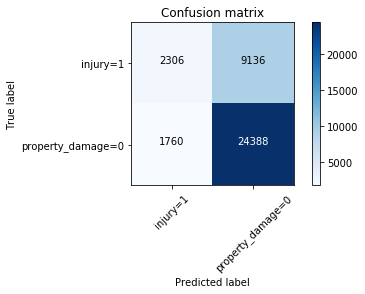

In [90]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury=1','property_damage=0'],normalize= False,  title='Confusion matrix')

In [91]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.93      0.82     26148
           1       0.57      0.20      0.30     11442

   micro avg       0.71      0.71      0.71     37590
   macro avg       0.65      0.57      0.56     37590
weighted avg       0.68      0.71      0.66     37590



In [92]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.72, 0.28],
       [0.69, 0.31],
       [0.54, 0.46],
       ...,
       [0.75, 0.25],
       [0.67, 0.33],
       [0.75, 0.25]])

In [93]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5550616869322567

## Modelling using Decision Tree

In [106]:
CollisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
CollisionTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [107]:
CollisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
predTree = CollisionTree.predict(X_test)

In [109]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7502793296089385
